In [1]:
# ATTENTION: Please do not alter any of the provided code in the exercise. Only add your own code where indicated
# ATTENTION: Please do not add or remove any cells in the exercise. The grader will check specific cells based on the cell position.
# ATTENTION: Please use the provided epoch values when training.

import csv
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from os import getcwd

In [2]:
def get_data(filename):
  # You will need to write code that will read the file passed
  # into this function. The first line contains the column headers
  # so you should ignore it
  # Each successive line contians 785 comma separated values between 0 and 255
  # The first value is the label
  # The rest are the pixel values for that picture
  # The function will return 2 np.array types. One with all the labels
  # One with all the images
  #
  # Tips: 
  # If you read a full line (as 'row') then row[0] has the label
  # and row[1:785] has the 784 pixel values
  # Take a look at np.array_split to turn the 784 pixels into 28x28
  # You are reading in strings, but need the values to be floats
  # Check out np.array().astype for a conversion
    images = []
    labels = []
    with open(filename) as training_file:
        # Your code starts here
        csv_reader = csv.reader(training_file, delimiter=',') 
        next(csv_reader) # used to skipping the first row
        for row in csv_reader:
            images.append(row[1:785])
            labels.append(row[0])
    images = np.array(images).astype('float32')
    labels = np.array(labels).astype('int')
    images = np.reshape(images, (images.shape[0], 28, 28))
        # Your code ends here
    return images, labels

path_sign_mnist_train = f"{getcwd()}/../tmp2/sign_mnist_train.csv"
path_sign_mnist_test = f"{getcwd()}/../tmp2/sign_mnist_test.csv"
training_images, training_labels = get_data(path_sign_mnist_train)
testing_images, testing_labels = get_data(path_sign_mnist_test)

# Keep these
print(training_images.shape)
print(training_labels.shape)
print(testing_images.shape)
print(testing_labels.shape)

# Their output should be:
# (27455, 28, 28)
# (27455,)
# (7172, 28, 28)
# (7172,)

(27455, 28, 28)
(27455,)
(7172, 28, 28)
(7172,)


In [3]:
# In this section you will have to add another dimension to the data
# So, for example, if your array is (10000, 28, 28)
# You will need to make it (10000, 28, 28, 1)
# Hint: np.expand_dims

# https://docs.scipy.org/doc/numpy/reference/generated/numpy.expand_dims.html
training_images = np.expand_dims(training_images, axis=-1)
testing_images = np.expand_dims(testing_images, axis=-1)

# Create an ImageDataGenerator and do Image Augmentation
train_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow(
    training_images,
    training_labels,
)

validation_generator = validation_datagen.flow(
    testing_images,
    testing_labels,
)
    
# Keep These
print(training_images.shape)
print(testing_images.shape)
    
# Their output should be:
# (27455, 28, 28, 1)
# (7172, 28, 28, 1)

(27455, 28, 28, 1)
(7172, 28, 28, 1)


In [4]:
# Define the model
# Use no more than 2 Conv2D and 2 MaxPooling2D
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(26, activation='softmax')
    ])

# Compile Model. 
model.compile(loss = 'sparse_categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

# Train the Model
history = model.fit_generator(train_generator, epochs=15, validation_data = validation_generator, verbose = 1)

model.evaluate(testing_images, testing_labels, verbose=0)

Epoch 1/15
858/858 [==============================] - 116s 135ms/step - loss: 2.6170 - accuracy: 0.2025 - val_loss: 1.5009 - val_accuracy: 0.5117
Epoch 2/15
858/858 [==============================] - 111s 130ms/step - loss: 1.8765 - accuracy: 0.4026 - val_loss: 1.0652 - val_accuracy: 0.6302
Epoch 3/15
858/858 [==============================] - 111s 129ms/step - loss: 1.4787 - accuracy: 0.5214 - val_loss: 0.7972 - val_accuracy: 0.7355
Epoch 4/15
858/858 [==============================] - 111s 130ms/step - loss: 1.2510 - accuracy: 0.5923 - val_loss: 0.5376 - val_accuracy: 0.8019
Epoch 5/15
858/858 [==============================] - 112s 130ms/step - loss: 1.0985 - accuracy: 0.6433 - val_loss: 0.4457 - val_accuracy: 0.8597
Epoch 6/15
858/858 [==============================] - 112s 130ms/step - loss: 0.9763 - accuracy: 0.6792 - val_loss: 0.3311 - val_accuracy: 0.8804
Epoch 7/15
858/858 [==============================] - 112s 131ms/step - loss: 0.8946 - accuracy: 0.7040 - val_loss: 0.3134 -

[123.18567854481839, 0.69297266]

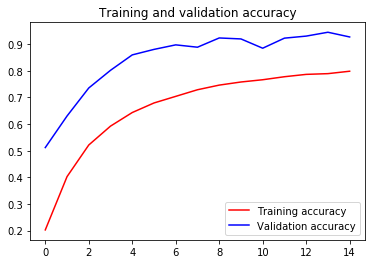

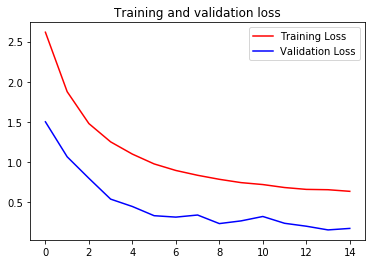

In [6]:
# Plot the chart for accuracy and loss on both training and validation
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
# Now click the 'Submit Assignment' button above.
# Once that is complete, please run the following two cells to save your work and close the notebook